# Workflow - Off-street parking fines

This notebook shows how to use the vizdataquality package to investigate data quality in a six-step workflow. The steps are:
- report.step1() Look at your data (is anything obviously wrong?)
- report.step2() Watch out for special values
- report.step3() Is any data missing?
- report.step4() Check each variable
- report.step5() Check combinations of variables
- report.step6() Profile the cleaned data

The example uses off-street parking fines data ('Quarter 4 201819.csv'), (c) Leeds City Council, 2019, https://datamillnorth.org/dataset/v8ggw/off-street-parking-fines. The data is licensed under the terms of the Open Government Licence (https://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/).

## Includes: viz_data_quality and other libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

from vizdataquality import calculate as vdqc, datasets as vdqd, plot as vdqp, report as vdqr

## Get a dataframe's profile

In [2]:
dataset_filename = '../examples/Quarter 4 201819.csv'
df1 = pd.read_csv(dataset_filename, parse_dates=['ISSUED', 'Last Pay Date'], dayfirst=True)
num_rows = df1.shape[0]
num_cols = df1.shape[1]
print('num_rows =', num_rows, 'num_cols =', num_cols)

num_rows = 7108 num_cols = 9


## Profile the dataframe

In [3]:
df_output1 = vdqc.calc(df1)

## Initialise the report

In [4]:
overwrite = False # True or False
report_folder = '../examples/Parking_fines_report/' # The folder in which the output is stored (it must exist).

if True:
    report_filename = 'report_parking fines.html'
    table_kw = {}
else:
    report_filename = 'report_parking fines.tex'
    mpl.rcParams['savefig.dpi'] = 300 # Save figures at 300 dpi
    table_kw={'position': 'h!'} # Ask Latex to place each image 'exactly here'

report = vdqr.Report()

report.add_title('Data quality issues and profiling of a car park fines dataset')

text = 'This report has been produced by applying the vizdataquality package to investigate data quality of a dataset about fines that were issued for all of the car parks in a city, during a three month period.'
text = text + ' The data is (c) Leeds City Council, 2019, https://datamillnorth.org/dataset/v8ggw/off-street-parking-fines, and is licensed under the terms of the Open Government Licence (https://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/).'
report.add_heading('Introduction', text=text)

text = 'The first five workflow steps investigate data quality and clean it in a structured manner. The 6th step profiled the cleaned data.'
report.paragraph(text)

3

## Workflow step 1: Look at your data (is anything obviously wrong?)

### Number of missing values and unique values in each variable

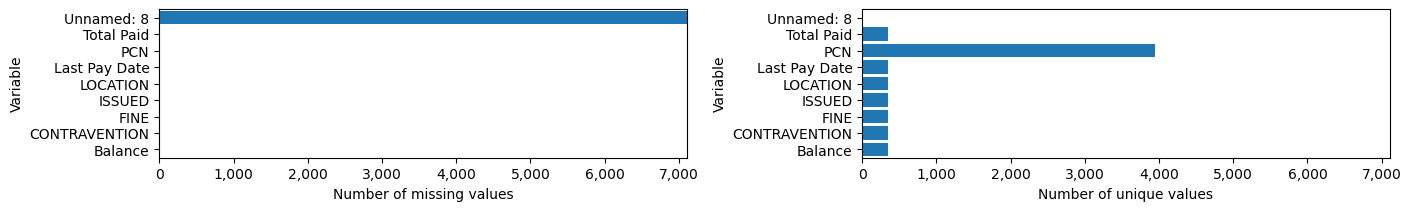

In [5]:
fig_kw = {'size_inches': (14, 2), 'constrained_layout': True}
ax_kw = {'xlim': (0, num_rows)}
columns = ['Number of missing values', 'Number of unique values']
vdqp.plotgrid('scalars', df_output1[columns].sort_index(), vert=False, fig_kw=fig_kw, ax_kw=ax_kw)


### Data types, example values and uniqueness

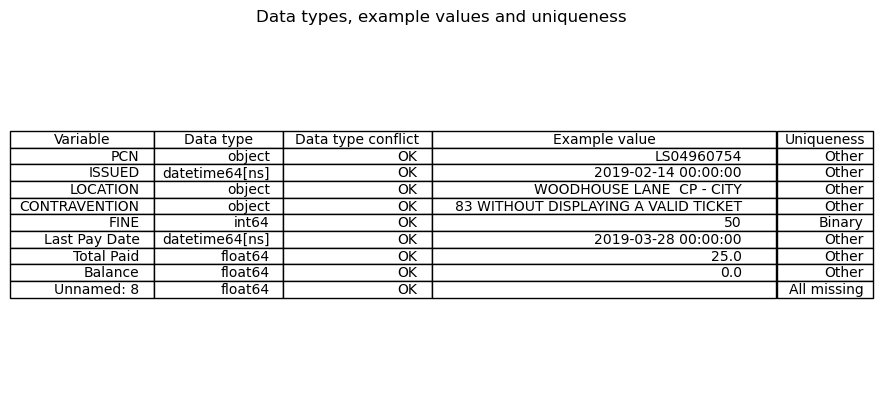

In [6]:
cols = ['Data type', 'Data type conflict', 'Example value', 'Uniqueness']
fig_kw = {}#'size_inches': (4, 2)}
ax_kw = {'title': 'Data types, example values and uniqueness'}
#, bbox_inches="tight"
vdqp.table(df_output1[cols], include_index=True, fig_kw=fig_kw, ax_kw=ax_kw, loc='center')

### Step 1 cleaning

Remove the empty, unnamed column and recalculate the descriptive statistics output

In [7]:
df2 = df1[df1.columns[:-1]]
df_output2 = vdqc.calc(df2)
num_rows = df2.shape[0]
num_cols = df2.shape[1]
print('num_rows =', num_rows, 'num_cols =', num_cols)

num_rows = 7108 num_cols = 8


### Step 1 report

In [8]:
report.step1('Each row of the data file ends with a comma, which produces an empty, unnamed column. That column has been removed in this step.')

4

## Workflow step 2: Watch out for special values

E.g., indicating a missing or invalid value. You will need to flag them as missing, etc. before proceeding to the next step.

### Range of datetime variables

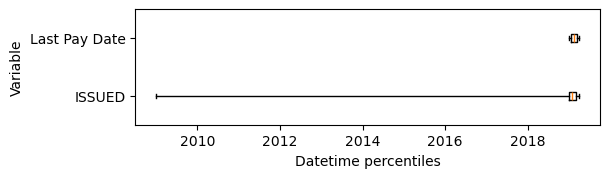

In [9]:
fig_kw = {'size_inches': (6, 1.5)}
vdqp.boxplot(df_output2[df_output2['Data type'] == 'datetime64[ns]']['Datetime percentiles'], vert=False, fig_kw=fig_kw)

In [10]:
# Investigate the unusual values
col = 'ISSUED'
dftmp = df2[df2[col] < datetime.datetime(2018, 1, 1, 0, 0, 0)]
print(col)
print('number of high values =', len(dftmp))
print('Unique values', dftmp[col].unique().tolist())


ISSUED
number of high values = 101
Unique values [Timestamp('2009-01-03 00:00:00'), Timestamp('2009-01-05 00:00:00'), Timestamp('2009-01-09 00:00:00'), Timestamp('2009-01-12 00:00:00'), Timestamp('2009-01-16 00:00:00'), Timestamp('2009-01-17 00:00:00'), Timestamp('2009-01-22 00:00:00'), Timestamp('2009-01-28 00:00:00'), Timestamp('2009-01-31 00:00:00'), Timestamp('2009-02-03 00:00:00'), Timestamp('2009-02-06 00:00:00'), Timestamp('2009-02-07 00:00:00'), Timestamp('2009-02-09 00:00:00'), Timestamp('2009-02-13 00:00:00'), Timestamp('2009-02-15 00:00:00'), Timestamp('2009-02-17 00:00:00'), Timestamp('2009-02-18 00:00:00'), Timestamp('2009-02-21 00:00:00'), Timestamp('2009-03-02 00:00:00'), Timestamp('2009-03-06 00:00:00'), Timestamp('2009-03-07 00:00:00'), Timestamp('2009-03-17 00:00:00'), Timestamp('2009-03-21 00:00:00'), Timestamp('2009-03-25 00:00:00'), Timestamp('2009-03-26 00:00:00'), Timestamp('2009-03-27 00:00:00'), Timestamp('2009-03-28 00:00:00'), Timestamp('2009-03-30 00:00:00')

### Range of numeric variables

#### All numeric variables

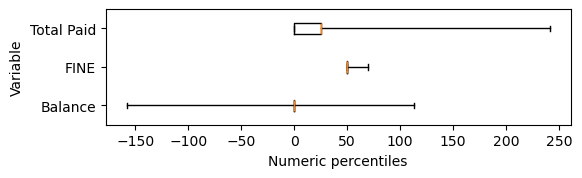

In [11]:
# Select all the numerical variables
dfo = df_output2.loc[df_output2['Data type'].isin(['int64','float64'])]

# Plot all the variables
fig_kw = {'size_inches': (6, 1.5)}
vdqp.boxplot(dfo['Numeric percentiles'].sort_index(), vert=False, fig_kw=fig_kw)

In [12]:
# Investigate the unusual values
col = 'Total Paid'
dftmp = df2[df2[col] > 50]
print(col)
print('number of high values =', len(dftmp))
print('Unique values', dftmp[col].unique().tolist())

col = 'Balance'
dftmp = df2[df2[col] < 0]
print(col)
print('number of negative values =', len(dftmp))
print('Unique values', dftmp[col].unique().tolist())

col = 'Balance'
dftmp = df2[df2[col] > 10]
print(col)
print('number of high values =', len(dftmp))
print('Unique values', dftmp[col].unique().tolist())

Total Paid
number of high values = 739
Unique values [83.0, 60.0, 88.0, 75.0, 241.0, 113.0, 100.0, 106.0, 166.0, 105.0, 150.0, 70.0]
Balance
number of negative values = 7
Unique values [-5.0, -158.0, -25.0]
Balance
number of high values = 509
Unique values [83.0, 75.0, 113.0, 80.91, 50.0, 70.0]


### Step 2: Cleaning

In [13]:
# None of the extreme values look like special values, so no cleaning required.
# Assign the dataframes to new names for the next step
df3 = df2
df_output3 = df_output2

### Step 2 report

In [14]:
report.step2('Sometimes datasets use special values (e.g., large integer values like 999, or old dates like 1 January 1800) to indicate values that are missing, invalid, etc. No such special values were found in this dataset.')

5

## Workflow step 3: Is any data missing?

### Number of missing values

In [15]:
print(df_output3['Number of missing values'].sort_index())

_column
Balance          0
CONTRAVENTION    0
FINE             0
ISSUED           0
LOCATION         0
Last Pay Date    0
PCN              0
Total Paid       0
Name: Number of missing values, dtype: int64


### Step 3: Cleaning

In [16]:
# No cleaning required, so assign the dataframes to new names for the next step
df4 = df3
df_output4 = df_output3

### Step 3 report

In [17]:
report.step3('None of the variables are missing any values.')

6

## Workflow step 4: Check each variable

### Value lengths

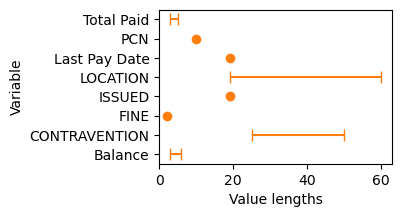

In [18]:
fig_kw = {'size_inches': (3, 2)}
ax_kw = {'xlim': 0}
vdqp.dot_whisker(df_output4['Value lengths'].sort_index(), vert=False, fig_kw=fig_kw, ax_kw=ax_kw)

#### Check for unusual category names

For any variables with a large range of value lengths, print the shortest, mid-length and longest value

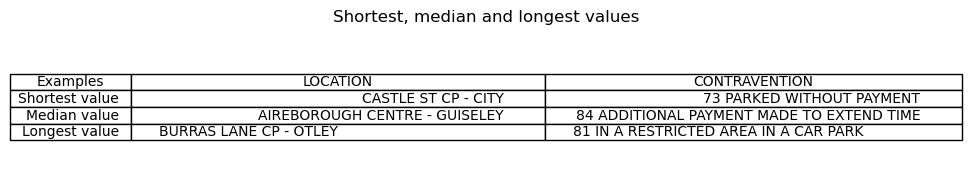

In [19]:
cols = ['LOCATION', 'CONTRAVENTION']
df_examples = vdqc.get_value_lengths_examples(df4[cols])
#print(df_examples)
fig_kw = {'size_inches': (4, 2)}
ax_kw = {'title': 'Shortest, median and longest values'}
vdqp.table(df_examples, include_index=False, fig_kw=fig_kw, ax_kw=ax_kw, loc='center')

### Categorical variables: Character patterns

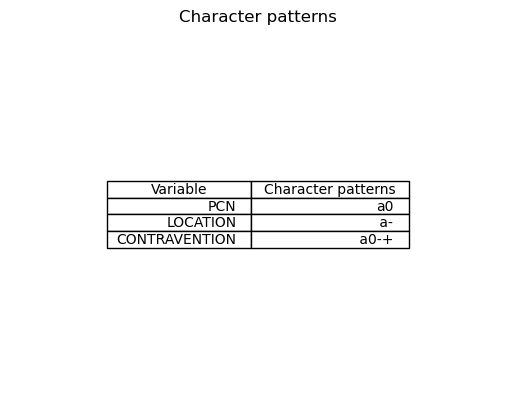

In [20]:
#print(df_output4[df_output4['Data type'] == 'object']['Character patterns'])
ax_kw = {'title': 'Character patterns'}
vdqp.table(df_output4[df_output4['Data type'] == 'object']['Character patterns'], include_index=True, ax_kw=ax_kw, loc='center')

### Value counts

#### Plot value counts for variables with 19 or fewer unique values

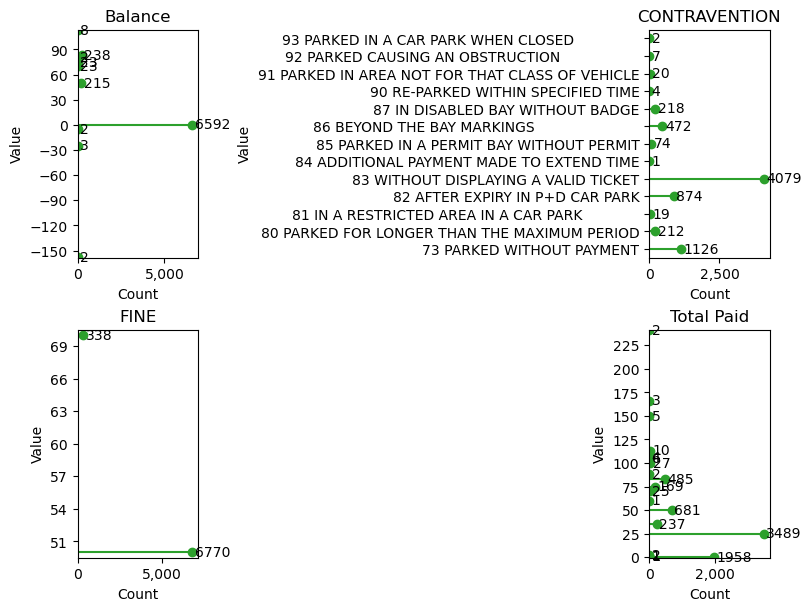

In [21]:
# Choose a threshold for plotting a variable's value counts
variables = df_output4[df_output4['Number of unique values'] <= 19].index.tolist()
variables.sort()


fig_kw = {'size_inches': (8, 6), 'constrained_layout': True}
ax_kw = {'xlim': 0, 'title': variables}
vdqp.plotgrid('value counts', df4[variables], num_cols=2, vert=False, datalabels=True, fig_kw=fig_kw, ax_kw=ax_kw)

#### Plot value counts for LOCATION

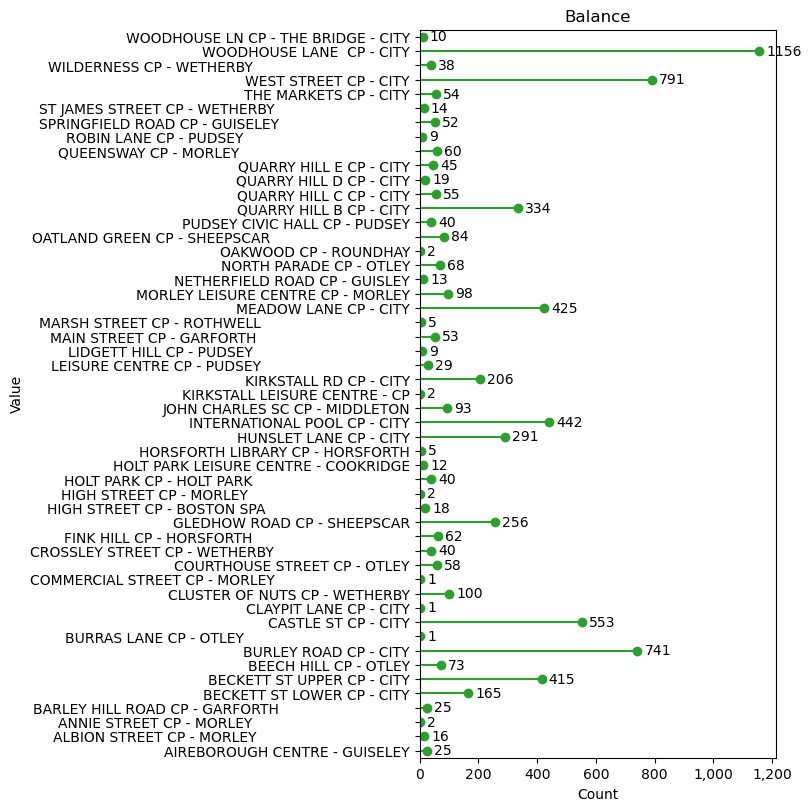

In [22]:
fig_kw = {'size_inches': (8, 8), 'constrained_layout': True}
ax_kw = {'xlim': 0, 'title': col}
col = 'LOCATION'
vdqp.lollipop(df4[col].value_counts(), vert=False, datalabels=True, fig_kw=fig_kw, ax_kw=ax_kw)

#### Plot value counts for PCN

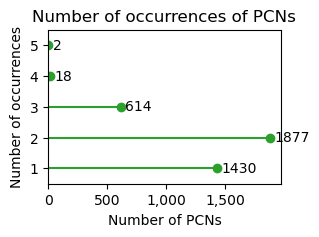

In [23]:
vc = df4['PCN'].value_counts()
fig_kw = {'size_inches': (3, 2)}
ax_kw = {'xlim': 0, 'title': 'Number of occurrences of PCNs', 'xlabel': 'Number of PCNs', 'ylabel': 'Number of occurrences'}
vdqp.lollipop(vc.value_counts(), vert=False, datalabels=True, fig_kw=fig_kw, ax_kw=ax_kw)

### Date distribution

#### ISSUED

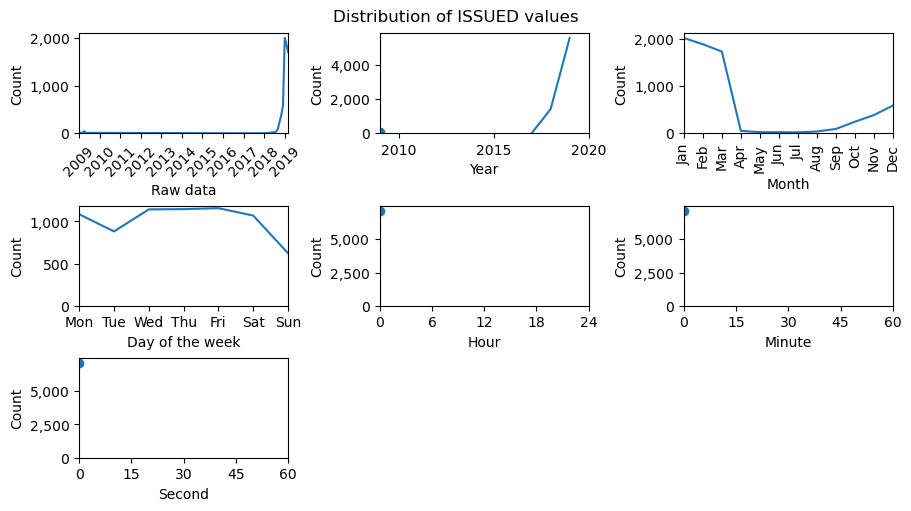

In [24]:
fig_kw = {'size_inches': (9, 5), 'constrained_layout': True}
ax_kw = {'title': 'Distribution of ISSUED values'}
components = ['raw data', 'year', 'month', 'dayofweek', 'hour', 'minute', 'second']
xrot = [45, 0, 90, 0, 0, 0, 0]
vdqp.plotgrid('datetime distribution', df4['ISSUED'], num_rows=3, num_cols=3, xlabels_rotate=xrot, fig_kw=fig_kw, ax_kw=ax_kw, components=components)

#### Last Pay Date

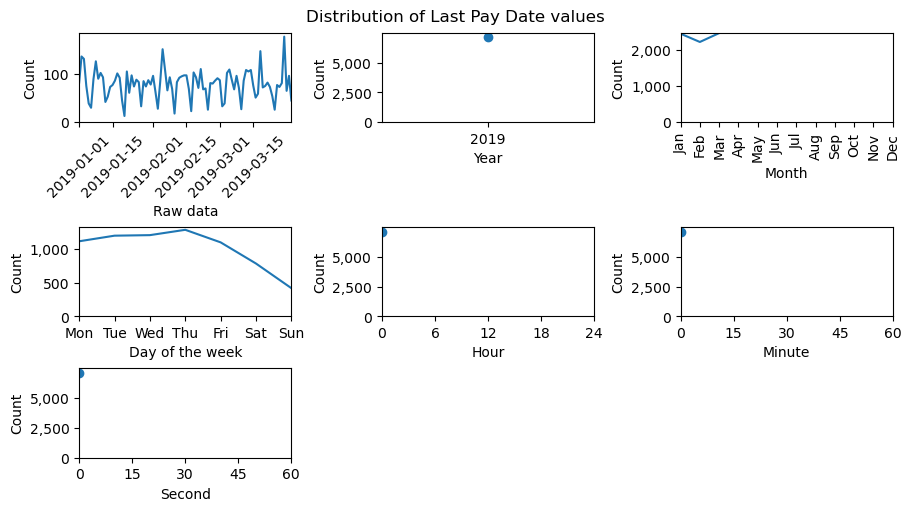

In [25]:
fig_kw = {'size_inches': (9, 5), 'constrained_layout': True}
ax_kw = {'title': 'Distribution of Last Pay Date values'}
components = ['raw data', 'year', 'month', 'dayofweek', 'hour', 'minute', 'second']
xrot = [45, 0, 90, 0, 0, 0, 0]
vdqp.plotgrid('datetime distribution', df4['Last Pay Date'], num_cols=3, xlabels_rotate=xrot, fig_kw=fig_kw, ax_kw=ax_kw, components=components)

### Step 4 cleaning

#### Copy the dataframe

In [26]:
df5 = df4.copy()

#### Trim any spaces from the the beginning/end of the 'LOCATION', 'CONTRAVENTION' values

In [27]:
for vv in ['LOCATION', 'CONTRAVENTION']:
    df5[vv] = df5[vv].apply(lambda x: x if pd.api.types.is_number(x) else x.strip())

#### Recalculate the descriptive statistics output

In [28]:
df_output5 = vdqc.calc(df5)

### Step 4 report

In [29]:
# The report about this step describes each group of variables in a seperate paragraph
report.step4()

text = "A plot of each variable's value lengths revealed issues with LOCATION and CONTRAVENTION."
text += ' Detailed investigation showed that some LOCATION and CONTRAVENTION values contain trailing spaces, so the data has been cleaned by stripping those trailing spaces.'
report.paragraph(text)
 
report.paragraph('The two date variables (ISSUED and Last Pay Date) only contain year, month and day (not time).')

report.paragraph('The PCN (the ID for a penalty charge notice) is not unique. Each PCN appears 1 to 5 times.')

report.paragraph('There are two values of FINE, but an unexpected number of different Balance and Total Paid values.')

11

## Workflow step 5: Check combinations of variables

Do they violate any of your assumptions or business rules?

### Check Balance = FINE - Total Paid

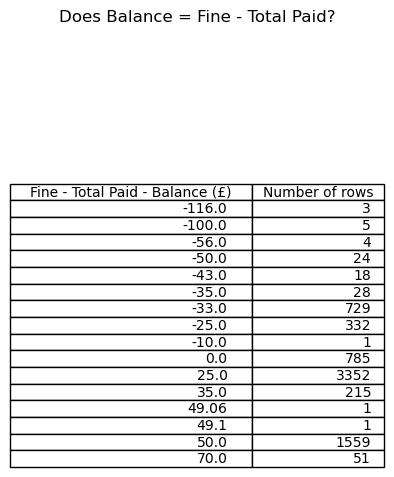

In [30]:
dftmp = df5.copy()

dftmp['Fine - Paid - Balance'] = df5['FINE'] - df5['Total Paid'] - df5['Balance']
# Check
#print('Number of records breaking FINE/Total Paid/Balance rule = ', len(dftmp[dftmp['Fine - Paid - Balance'] != 0]))
#print(dftmp['Fine - Paid - Balance'].value_counts().sort_index())

if len(dftmp[dftmp['Fine - Paid - Balance'] != 0]) > 0:
    vc = pd.DataFrame(dftmp['Fine - Paid - Balance'].value_counts().sort_index()).reset_index()
    # Output the second column (number of rows) as integers, not floats
    vc[vc.columns[1]] = vc[vc.columns[1]].astype('object')
    fig_kw = {'size_inches': (4, 2)}
    ax_kw = {'title': 'Does Balance = Fine - Total Paid?'}
    vdqp.table(vc, include_index=False, fig_kw=fig_kw, ax_kw=ax_kw, colLabels=['Fine - Total Paid - Balance (£)', 'Number of rows'])

### Step 5: Cleaning

In [31]:
# No cleaning required, so assign the dataframes to new names for the next step
df6 = df5
df_output6 = df_output5

### Step 5 report

In [32]:
text = 'It would be logical to expect FINE - Total Paid = Balance.'
text += ' However, that is only true for 785 (11%) of the records.'
text += ' For thousands of other records the difference is the whole value of the FINE (50 or 75 pounds) or half its value (25 or 35 pounds).'
text += ' Other records have unusual differences (e.g., 49.06).'
report.step5(text)

12

## Workflow step 6: Characterise the cleaned data

In [33]:
# Header
report.step6()
report.dataset_size(dataset_filename, num_rows, num_cols, text='$table shows the number of rows and columns in the dataset.')

cols = ['Data type', 'Example value']
report.add_descriptive_stats(df_output6[cols], '$table shows information about each variable.', 'Data types and example values.')

15

### Numbers of values (also indicating there are no missing values) and unique values

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/numvals_uniquevals.jpg


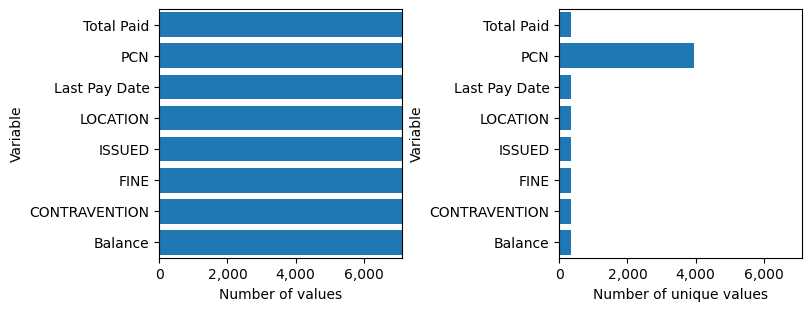

16

In [34]:
columns = ['Number of values', 'Number of unique values']
fig_kw = {'size_inches': (8, 3), 'constrained_layout': True}
ax_kw = {'xlim': (0, num_rows)}
fig_filename = os.path.join(report_folder, 'numvals_uniquevals.jpg')
vdqp.plotgrid('scalars', df_output6[columns].sort_index(), num_cols=2, vert=False, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw)
text = '$figure shows that every variable is complete, but none are unique for every record.'
report.add_figure(fig_filename, text=text, caption='The number of values and unique values in each variable.')

### Value distributions

#### Plot value counts for PCN

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/value_counts PCN.jpg


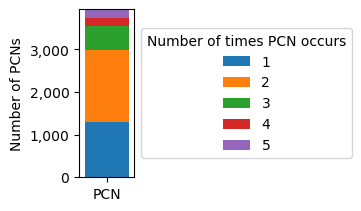

17

In [35]:
# Number of times each PCN occurs in the dataset
pcn_cnt = df6['PCN'].value_counts()
# Number of PCNs that occur 1, 2, 3, etc. times
vc = pcn_cnt.value_counts().sort_index()

fig_filename = os.path.join(report_folder, 'value_counts PCN.jpg')

fig_kw = {'size_inches': (3.5, 2), 'constrained_layout': True}
vc.name = 'PCN'
ax_kw = {'xlabel': None, 'ylim': (0, vc.sum()), 'ylabel': 'Number of PCNs'}
legend_kw = {'title': 'Number of times PCN occurs', 'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}
vdqp.stacked_bar(vc, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw, legend_kw=legend_kw)

text = '$figure shows that 1430 PCNs occur once, and the other 2511 PCNs each occur 2 - 5 times.'
report.add_figure(fig_filename, text, 'Number of occurrences of PCNs.')

#### Plot value counts for LOCATION

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/value_counts LOCATION.jpg


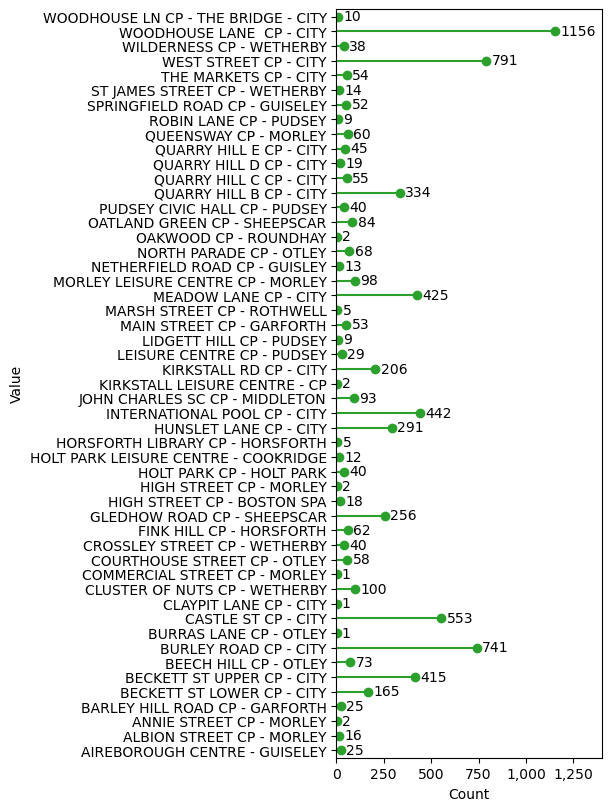

18

In [36]:
fig_kw = {'size_inches': (6, 8), 'constrained_layout': True}
ax_kw = {'xlim': (0, 1400)}
col = 'LOCATION'
fig_filename = os.path.join(report_folder, 'value_counts LOCATION.jpg')
vdqp.lollipop(df6[col].value_counts(), vert=False, datalabels=True, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw)
text = '$figure shows that some car parks have only one or two records, whereas one car park has more than 1000.'
report.add_figure(fig_filename, text, 'Number of records for each LOCATION.')

#### Plot value counts for CONTRAVENTION

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/value_counts CONTRAVENTION.jpg


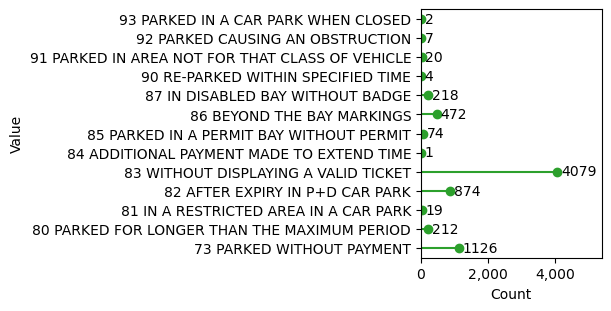

19

In [37]:
fig_kw = {'size_inches': (6, 3), 'constrained_layout': True}
ax_kw = {'xlim': (0, 5400)}
col = 'CONTRAVENTION'
fig_filename = os.path.join(report_folder, 'value_counts CONTRAVENTION.jpg')
vdqp.lollipop(df6[col].value_counts(), vert=False, datalabels=True, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw)
text = '$figure shows that Contravention 83 occurs in more records than all of the other contraventions put together, some of which only occur once or twice.'
report.add_figure(fig_filename, text, 'Number of records for each CONTRAVENTION.')

#### Dates

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/date_distribution_1.jpg


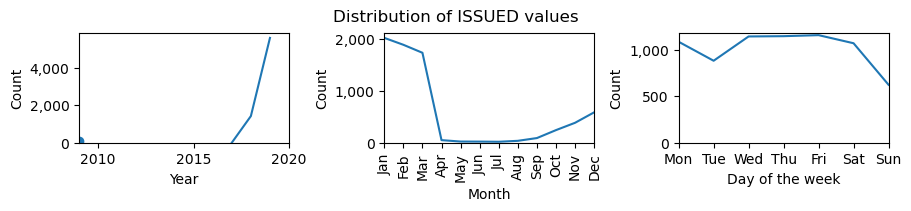

20

In [38]:
fig_kw = {'size_inches': (9, 2), 'constrained_layout': True}
ax_kw = {'title': 'Distribution of ISSUED values'}
components = ['year', 'month', 'dayofweek']
xrot = [0, 90, 0]
fig_filename = os.path.join(report_folder, 'date_distribution_1.jpg')
vdqp.plotgrid('datetime distribution', df6['ISSUED'], num_cols=3, xlabels_rotate=xrot, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw, components=components)
text = '$figure shows that most issued dates are from the past two years, but a few are from 10 years ago.'
report.add_figure(fig_filename, text, 'Distribution of ISSUED dates.')

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/date_distribution_2.jpg


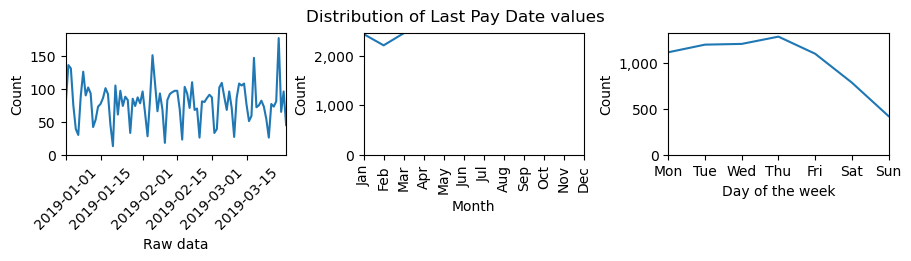

21

In [39]:
fig_kw = {'size_inches': (9, 2.5), 'constrained_layout': True}

ax_kw = {'title': 'Distribution of Last Pay Date values'}
components = ['raw data', 'month', 'dayofweek']
xrot = [45, 90, 0]
fig_filename = os.path.join(report_folder, 'date_distribution_2.jpg')
vdqp.plotgrid('datetime distribution', df6['Last Pay Date'], num_cols=3, xlabels_rotate=xrot, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw, components=components)
text = '$figure shows that, as expected, all of the Last Pay Dates are in Jan - Mar 2019.'
report.add_figure(fig_filename, text, 'Distribution of Last Pay Date dates.')

#### Balance, FINE and Total Paid

##### Value counts

** WARNING ** vizdataquality, plot.py, _draw_fig(): Figure not output because a file with the supplied name already exists.
../examples/Parking_fines_report/value_counts balance_fine_totalpaid.jpg


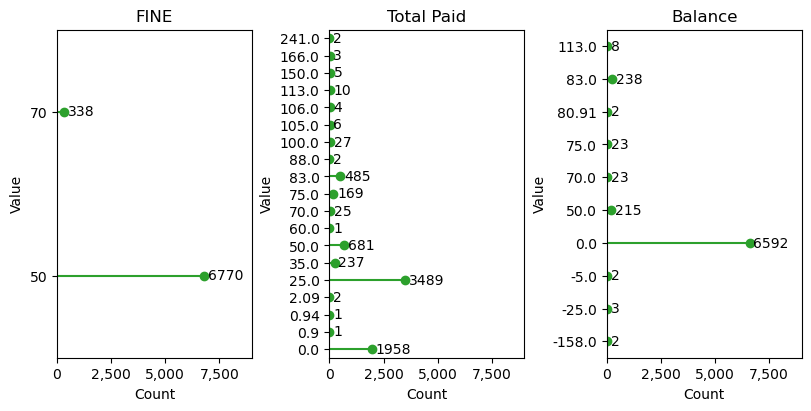

22

In [40]:
variables = ['FINE', 'Total Paid', 'Balance']

fig_kw = {'size_inches': (8, 4), 'constrained_layout': True}
ax_kw = {'xlim': (0, 9000), 'title': variables}
fig_filename = os.path.join(report_folder, 'value_counts balance_fine_totalpaid.jpg')
vdqp.plotgrid('value counts', df4[variables], num_cols=3, vert=False, datalabels=True, continuous_value_axis=False, filename=fig_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw)
text = '$figure shows that FINE is 50 or 70 pounds, but there are many unexpected values of Total Paid and Balance.'
report.add_figure(fig_filename, text, 'Value counts for the fine, total paid and balance.')

##### Relationship between Balance, FINE, Total Paid and the difference between the ISSUED and Last Pay Date

In [41]:
# Create a column that contains the number of days between 'ISSUED' and 'Last Pay Date'
dftmp['Days since ISSUED'] = dftmp.apply(lambda x: (x['Last Pay Date'] - x['ISSUED']) / np.timedelta64(1,'D'), axis=1)

# Create a column that contains the fine adjusted for any discount/penalty
dftmp['Adjusted fine'] = dftmp.apply(lambda x: x['FINE'] * (0.5 if x['Days since ISSUED'] <= 14 else (1 if x['Days since ISSUED'] <= 56 else (1.5 if x['Days since ISSUED'] <= 70 else -99999))), axis=1)

data = {}
data['FINE, Total Paid & Balance'] = ['Consistent'] * 3 +  ['Inconsistent'] * 3
data['Balance'] = ['Negative', 'Zero', 'Positive'] * 2
min_days = 0
days = [14, 56, 70, dftmp['Days since ISSUED'].max()]
day_columns = {14: '0-14 days', 56: '15-56 days', 70: '57-70 days', days[-1]: '71+ days'}

for dd in days:
    col_data = []
    # The records for this range of days
    dftmp_days = dftmp[(dftmp['Days since ISSUED'] >= min_days) & (dftmp['Days since ISSUED'] <= dd)]

    for l1 in range(2):
        if l1 == 0:
            # 'Adjusted fine', Total Paid' and 'Balance' are consistent
            dftmp_days_amount = dftmp_days[dftmp_days['FINE'] == dftmp_days['Adjusted fine']]
        else:
            # Inconsistent
            dftmp_days_amount = dftmp_days[dftmp_days['FINE'] != dftmp_days['Adjusted fine']]

        col_data.append(len(dftmp_days_amount[dftmp_days_amount['Balance'] < 0]))
        col_data.append(len(dftmp_days_amount[dftmp_days_amount['Balance'] == 0]))
        col_data.append(len(dftmp_days_amount[dftmp_days_amount['Balance'] > 0]))

    # Add the column of data to the data dictionary
    data[day_columns[dd]] = col_data
    # Set minimum days for the next loop
    min_days = dd + 1
    
df_table = pd.DataFrame.from_dict(data)
# Check all rows were included
#print('#rows', df_table.sum(numeric_only=True).sum())

text = '$table shows that only for fines paid during the normal time period (no discount or penalty) is the following rule true: Balance = FINE - Total Paid.'
caption = 'Relationship between Balance, FINE, Total Paid and the difference between the ISSUED and Last Pay Date.'
report.add_table(df_table, text=text, caption=caption)

23

In [42]:
report.add_acknowledgements()

24

In [43]:
report.save(os.path.join(report_folder, report_filename), overwrite=overwrite, table_kw=table_kw)